# Imports

# Imports

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

# Games Data

In [2]:
data_path = os.path.join("..", "data", "games.csv")
df = pd.read_csv(data_path, parse_dates=["Date", "Open"], date_format="%Y-%m-%d", index_col=0)
df.head()

,Season,Date,HID,AID,N,POFF,Open,OddsH,OddsA,H,A,HSC,ASC,HFGM,AFGM,HFGA,AFGA,HFG3M,AFG3M,HFG3A,AFG3A,HFTM,AFTM,HFTA,AFTA,HORB,AORB,HDRB,ADRB,HRB,ARB,HAST,AAST,HSTL,ASTL,HBLK,ABLK,HTOV,ATOV,HPF,APF
0,1,1975-11-07,13,28,0,0,1975-11-06,1.196537,4.833232,1,0,108,104,43.0,39.0,84.0,83.0,2.0,0.0,3.0,3.0,20.0,26.0,30.0,35.0,18.0,14.0,30.0,21.0,48.0,35.0,26.0,26.0,7.0,14.0,5.0,4.0,25.0,14.0,27.0,26.0
1,1,1975-11-07,20,12,0,0,1975-11-06,1.394620,2.957488,1,0,103,77,32.0,28.0,76.0,90.0,2.0,0.0,3.0,4.0,37.0,21.0,47.0,30.0,16.0,15.0,44.0,29.0,60.0,44.0,14.0,21.0,7.0,5.0,5.0,2.0,22.0,21.0,31.0,33.0
2,1,1975-11-07,43,8,0,0,1975-11-06,1.502570,2.536599,1,0,127,123,49.0,49.0,92.0,99.0,0.0,1.0,0.0,6.0,29.0,24.0,36.0,31.0,14.0,18.0,36.0,27.0,50.0,45.0,29.0,26.0,9.0,15.0,10.0,3.0,23.0,18.0,19.0,31.0
3,1,1975-11-07,33,4,0,0,1975-11-06,1.275743,3.778120,1,0,134,104,55.0,43.0,102.0,93.0,1.0,2.0,2.0,6.0,23.0,16.0,26.0,24.0,19.0,16.0,35.0,18.0,54.0,34.0,36.0,27.0,9.0,7.0,7.0,4.0,13.0,17.0,18.0,22.0
4,1,1975-11-07,41,34,0,0,1975-11-06,1.112895,7.379109,1,0,120,102,47.0,37.0,84.0,85.0,1.0,0.0,4.0,1.0,25.0,28.0,25.0,36.0,14.0,20.0,30.0,18.0,44.0,38.0,31.0,18.0,5.0,10.0,6.0,6.0,18.0,22.0,27.0,25.0


In [3]:
for i, row in df.iterrows():
    df.loc[i, "OddsAdjH"] = row["OddsH"] - 1 if row["H"] else -1
    df.loc[i, "OddsAdjA"] = row["OddsA"] - 1 if row["A"] else -1
    df.loc[i, "OddsW"] = row["OddsH"] if row["H"] else row["OddsA"] 

df["OddsAdjW"] = df["OddsW"] - 1
df["SortedTID"] = df[["HID", "AID"]].apply(lambda x: tuple(sorted(x)), axis=1)

In [4]:
columnsH = ["HSC", "HFGM", "HFGA", "HFG3M", "HFG3A", "HFTM", "HFTA", "HORB", "HDRB", "HRB", "HAST", "HSTL", "HBLK", "HTOV", "HPF"]
columnsA = ["ASC", "AFGM", "AFGA", "AFG3M", "AFG3A", "AFTM", "AFTA", "AORB", "ADRB", "ARB", "AAST", "ASTL", "ABLK", "ATOV", "APF"]

In [5]:
meta_columns = ["Season", "Date", "HID", "AID", "N", "POFF", "Open", "H", "A", "OddsH", "OddsA", "OddsW", "OddsAdjH", "OddsAdjA", "OddsAdjW", "SortedTID"]
df[meta_columns].head()

,Season,Date,HID,AID,N,POFF,Open,H,A,OddsH,OddsA,OddsW,OddsAdjH,OddsAdjA,OddsAdjW,SortedTID
0,1,1975-11-07,13,28,0,0,1975-11-06,1,0,1.196537,4.833232,1.196537,0.196537,-1.0,0.196537,"(13, 28)"
1,1,1975-11-07,20,12,0,0,1975-11-06,1,0,1.394620,2.957488,1.394620,0.394620,-1.0,0.394620,"(12, 20)"
2,1,1975-11-07,43,8,0,0,1975-11-06,1,0,1.502570,2.536599,1.502570,0.502570,-1.0,0.502570,"(8, 43)"
3,1,1975-11-07,33,4,0,0,1975-11-06,1,0,1.275743,3.778120,1.275743,0.275743,-1.0,0.275743,"(4, 33)"
4,1,1975-11-07,41,34,0,0,1975-11-06,1,0,1.112895,7.379109,1.112895,0.112895,-1.0,0.112895,"(34, 41)"


## Season statistics

In [6]:
df_sea = df.groupby("Season")

### Number of Games per Season

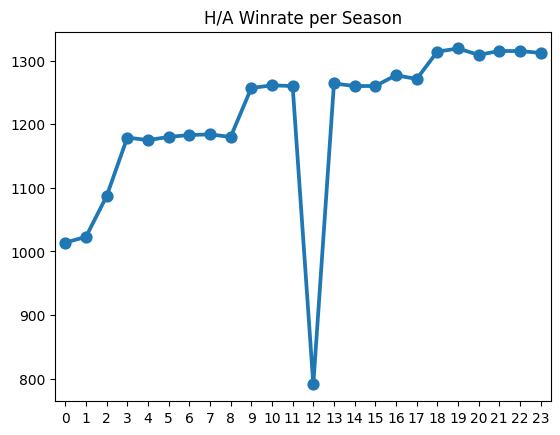

In [7]:
games_num = df_sea.size()

sns.pointplot(games_num.values)
plt.title("H/A Winrate per Season")
plt.show()

### Number of Games per Season - no duplicates

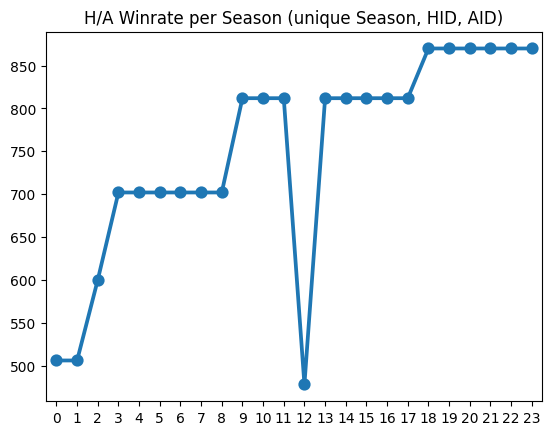

In [8]:
games_num_no_duplicates = df.drop_duplicates(["Season", "HID", "AID"]).groupby("Season").size()

sns.pointplot(games_num_no_duplicates.values)
plt.title("H/A Winrate per Season (unique Season, HID, AID)")
plt.show()

### H and A Winrate per Season

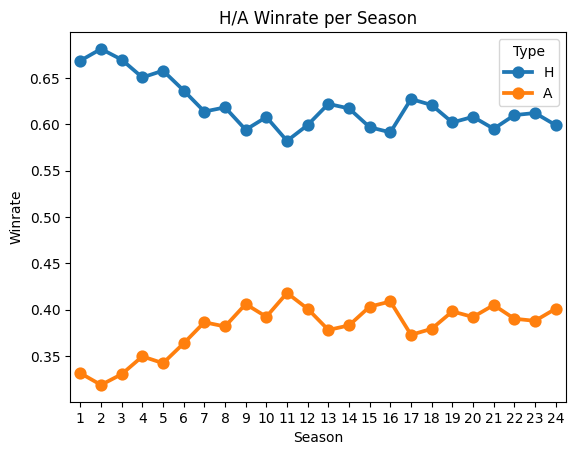

In [9]:
df_sea_winrate = df_sea[["H", "A"]].mean()
df_sea_winrate = df_sea_winrate.reset_index().melt(id_vars=["Season"], var_name="Type", value_name="Winrate")

sns.pointplot(df_sea_winrate, x="Season", y="Winrate", hue="Type")
plt.title("H/A Winrate per Season")
plt.show()


### H and A average Goals per Season

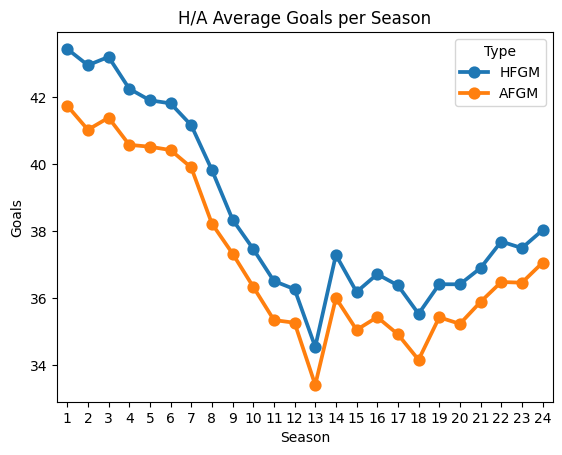

In [10]:
df_sea_goals = df_sea[["HFGM", "AFGM"]].mean()
df_sea_goals = df_sea_goals.reset_index().melt(id_vars=["Season"], var_name="Type", value_name="Goals")

sns.pointplot(df_sea_goals, x="Season", y="Goals", hue="Type")
plt.title("H/A Average Goals per Season")
plt.show()


### H and A average 3-Goals per Season

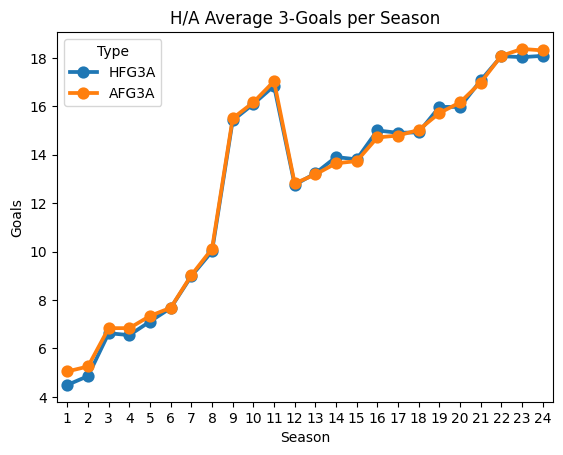

In [11]:
df_sea_goals3 = df_sea[["HFG3A", "AFG3A"]].mean()
df_sea_goals3 = df_sea_goals3.reset_index().melt(id_vars=["Season"], var_name="Type", value_name="Goals")

sns.pointplot(df_sea_goals3, x="Season", y="Goals", hue="Type")
plt.title("H/A Average 3-Goals per Season")
plt.show()


### H and A average Score per Season

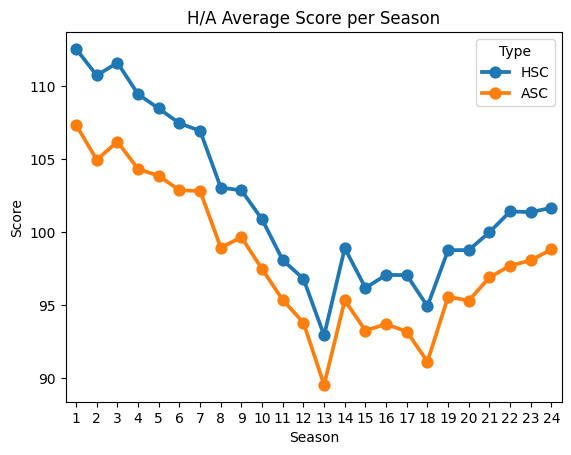

In [12]:
df_sea_score = df_sea[["HSC", "ASC"]].mean()
df_sea_score = df_sea_score.reset_index().melt(id_vars=["Season"], var_name="Type", value_name="Score")

sns.pointplot(df_sea_score, x="Season", y="Score", hue="Type")
plt.title("H/A Average Score per Season")
plt.show()


### Number of games between two teams

In [13]:
df.groupby(["Season", "SortedTID"]).size().reset_index().groupby("Season").describe()

0                                              
        count      mean       std  min  25%  50%  75%   max
Season                                                     
1       253.0  4.007905  2.357009  2.0  2.0  2.0  6.0  13.0
2       253.0  4.043478  2.457998  2.0  2.0  2.0  6.0  13.0
3       300.0  3.623333  2.048277  2.0  2.0  2.0  5.0  12.0
4       351.0  3.358974  1.735980  2.0  2.0  2.0  4.0  12.0
5       351.0  3.347578  1.684887  2.0  2.0  2.0  4.0  11.0
6       351.0  3.361823  1.734563  2.0  2.0  2.0  4.0  11.0
7       351.0  3.370370  1.751613  2.0  2.0  2.0  4.0  12.0
8       351.0  3.373219  1.800086  2.0  2.0  2.0  4.0  12.0
9       351.0  3.361823  1.770430  2.0  2.0  2.0  4.0  12.0
10      406.0  3.096059  1.430923  2.0  2.0  2.0  4.0  11.0
11      406.0  3.105911  1.469396  2.0  2.0  2.0  4.0  11.0
12      406.0  3.103448  1.445004  2.0  2.0  2.0  4.0  11.0
13      281.0  2.814947  1.565678  1.0  1.0  3.0  3.0   9.0
14      406.0  3.113300  1.499620  2.0  2.0  2.0  4.0  11.0
15      406.0  3.103448  1.460302  2.0  2.0  2.0  4.0  11.0
16      406.0  3.103448  1.461992  2.0  2.0  2.0  4.0  11.0
17      406.0  3.145320  1.595074  2.0  2.0  2.0  4.0  11.0
18      406.0  3.130542  1.557206  2.0  2.0  2.0  4.0  11.0
19      435.0  3.020690  1.466063  2.0  2.0  2.0  4.0  11.0
20      435.0  3.032184  1.541701  2.0  2.0  2.0  4.0  11.0
21      435.0  3.009195  1.433602  2.0  2.0  2.0  4.0  11.0
22      435.0  3.022989  1.494822  2.0  2.0  2.0  4.0  11.0
23      435.0  3.022989  1.488644  2.0  2.0  2.0  4.0  11.0
24      435.0  3.016092  1.464548  2.0  2.0  2.0  4.0  10.0

### Number of games between two teams - with respect to IDs

In [14]:
df.groupby(["Season", "HID", "AID"]).size().reset_index().groupby("Season")[0].describe()

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
1,506.0,2.003953,1.200653,1.0,1.0,1.0,3.0,7.0
2,506.0,2.021739,1.251345,1.0,1.0,1.0,3.0,7.0
3,600.0,1.811667,1.035044,1.0,1.0,1.0,2.0,6.0
4,702.0,1.679487,0.897679,1.0,1.0,1.0,2.0,6.0
5,702.0,1.673789,0.871401,1.0,1.0,1.0,2.0,6.0
6,702.0,1.680912,0.894207,1.0,1.0,1.0,2.0,6.0
7,702.0,1.685185,0.904440,1.0,1.0,1.0,2.0,7.0
8,702.0,1.686610,0.925972,1.0,1.0,1.0,2.0,6.0
9,702.0,1.680912,0.910020,1.0,1.0,1.0,2.0,6.0


### Possible earnings

In [15]:
df_sea[["OddsAdjH", "OddsAdjA", "OddsAdjW"]].sum()

,OddsAdjH,OddsAdjA,OddsAdjW
Season,,,
1,37.189754,-249.237287,801.952467
2,52.451465,-287.921755,787.529710
3,52.013771,-274.476198,864.537573
4,-6.043861,-241.730392,931.225747
5,31.915688,-243.582663,963.333025
6,-37.629271,-155.637443,986.733286
7,-64.656850,-62.315161,1056.027989
8,-83.044385,-112.352379,988.603235
9,-89.131732,16.015655,1106.883923


### Earnings with respect to the probability of guessing the winner

In [16]:
df_sea_p = pd.DataFrame()

for threshold in np.linspace(0, 1, 21, True):
    threshold = np.round(threshold, 2)
    for sea, df_sea_ in df_sea:

        gain = 0
        for _, row in df_sea_.iterrows():
            gain += row["OddsAdjW"] if np.random.uniform() <= threshold else -1

        df_sea_p.loc[sea, threshold] = gain

#### Earnings per Season

In [17]:
display(df_sea_p)

,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
1,-1014.0,-925.603365,-819.266457,-707.587617,-639.254353,-556.004038,-480.093041,-378.977516,-258.292648,-245.700883,-100.653628,-35.344152,76.192470,148.112137,302.629647,313.243896,446.366552,519.569588,625.656513,692.764305,801.952467
2,-1023.0,-948.908632,-845.434243,-757.613266,-671.618584,-593.331660,-477.551880,-384.647613,-323.914732,-253.599741,-98.959348,-14.686477,28.955176,135.252018,253.491085,359.715554,398.802979,488.434439,638.286343,696.081413,787.529710
3,-1087.0,-993.742438,-881.023013,-771.186088,-714.866023,-561.592783,-525.661750,-437.034702,-270.569466,-141.999429,-164.771614,42.444137,93.930294,152.951038,243.561042,354.511598,458.581347,596.129080,689.428886,802.550517,864.537573
4,-1179.0,-1065.732698,-988.844353,-861.651359,-670.261255,-694.518450,-521.015738,-407.382357,-283.365903,-203.381184,-79.134584,-25.035050,95.878686,226.770638,263.531568,390.621428,479.456459,665.267288,720.731631,863.354198,931.225747
5,-1175.0,-1050.497777,-926.268784,-873.476870,-733.680584,-625.473605,-494.315513,-438.073989,-290.199974,-243.735917,-136.061442,-1.400586,140.078453,152.476704,324.217773,486.844834,514.285885,643.230200,788.172908,859.179441,963.333025
6,-1180.0,-1087.774524,-951.804605,-872.474470,-783.981826,-692.261080,-505.649670,-382.067204,-321.948339,-250.866502,-98.103607,51.890762,86.666850,243.703152,355.059565,401.652839,564.471796,659.046558,743.185200,911.514237,986.733286
7,-1183.0,-1063.814352,-896.129687,-842.948086,-711.855111,-641.736797,-527.340441,-441.513530,-270.654836,-214.392727,-82.398626,45.713153,201.560428,328.997844,357.662149,504.909048,602.603506,692.345549,817.881768,929.462958,1056.027989
8,-1184.0,-1076.077391,-955.851814,-831.895110,-778.162455,-636.541048,-522.556740,-406.776611,-247.105033,-225.546894,-34.094283,-27.279003,121.358484,162.317484,347.987228,471.290395,570.907563,689.225176,795.785685,855.982241,988.603235
9,-1180.0,-1036.093142,-958.055532,-823.511572,-688.598421,-616.213674,-449.120318,-379.552752,-242.772822,-179.151538,-85.692890,105.332731,226.778501,297.720601,434.910969,539.166500,659.548713,757.590744,833.670312,1012.588961,1106.883923
10,-1257.0,-1145.636984,-1036.422687,-900.572104,-833.185955,-693.069197,-505.511424,-456.218746,-350.526078,-170.570906,-63.305189,-23.988113,132.024432,276.088077,330.233577,460.725589,628.354100,692.761941,895.934830,935.261475,1071.793786


#### Aggregated per Probability

In [18]:
df_sea_p.describe().T.drop(columns="count").sort_index(ascending=False)

,mean,std,min,25%,50%,75%,max
1.00,1046.203546,139.829389,717.259743,980.883221,1091.729322,1131.641610,1220.607840
0.95,932.352615,125.423981,620.752523,862.310509,972.431697,1014.518616,1085.724730
0.90,817.734966,109.951601,538.801879,776.925981,836.936855,897.503153,955.379121
0.85,710.908389,104.294555,488.434439,663.712105,729.884519,785.773775,884.122709
0.80,589.777278,99.744806,375.458365,551.925318,609.370132,655.191228,770.281314
0.75,479.097626,81.766834,313.243896,424.544829,500.230770,540.467562,595.515166
0.70,367.209411,69.916847,243.561042,319.889585,356.360857,424.238280,487.517745
0.65,252.016521,69.410746,135.252018,221.395661,252.553315,294.118677,377.358977
0.60,152.281019,51.690759,28.955176,129.357945,150.177269,181.581251,247.921153
0.55,36.959732,50.165533,-35.344152,-2.860300,33.661992,78.515363,134.186779


### Feature Correlation In Last Season

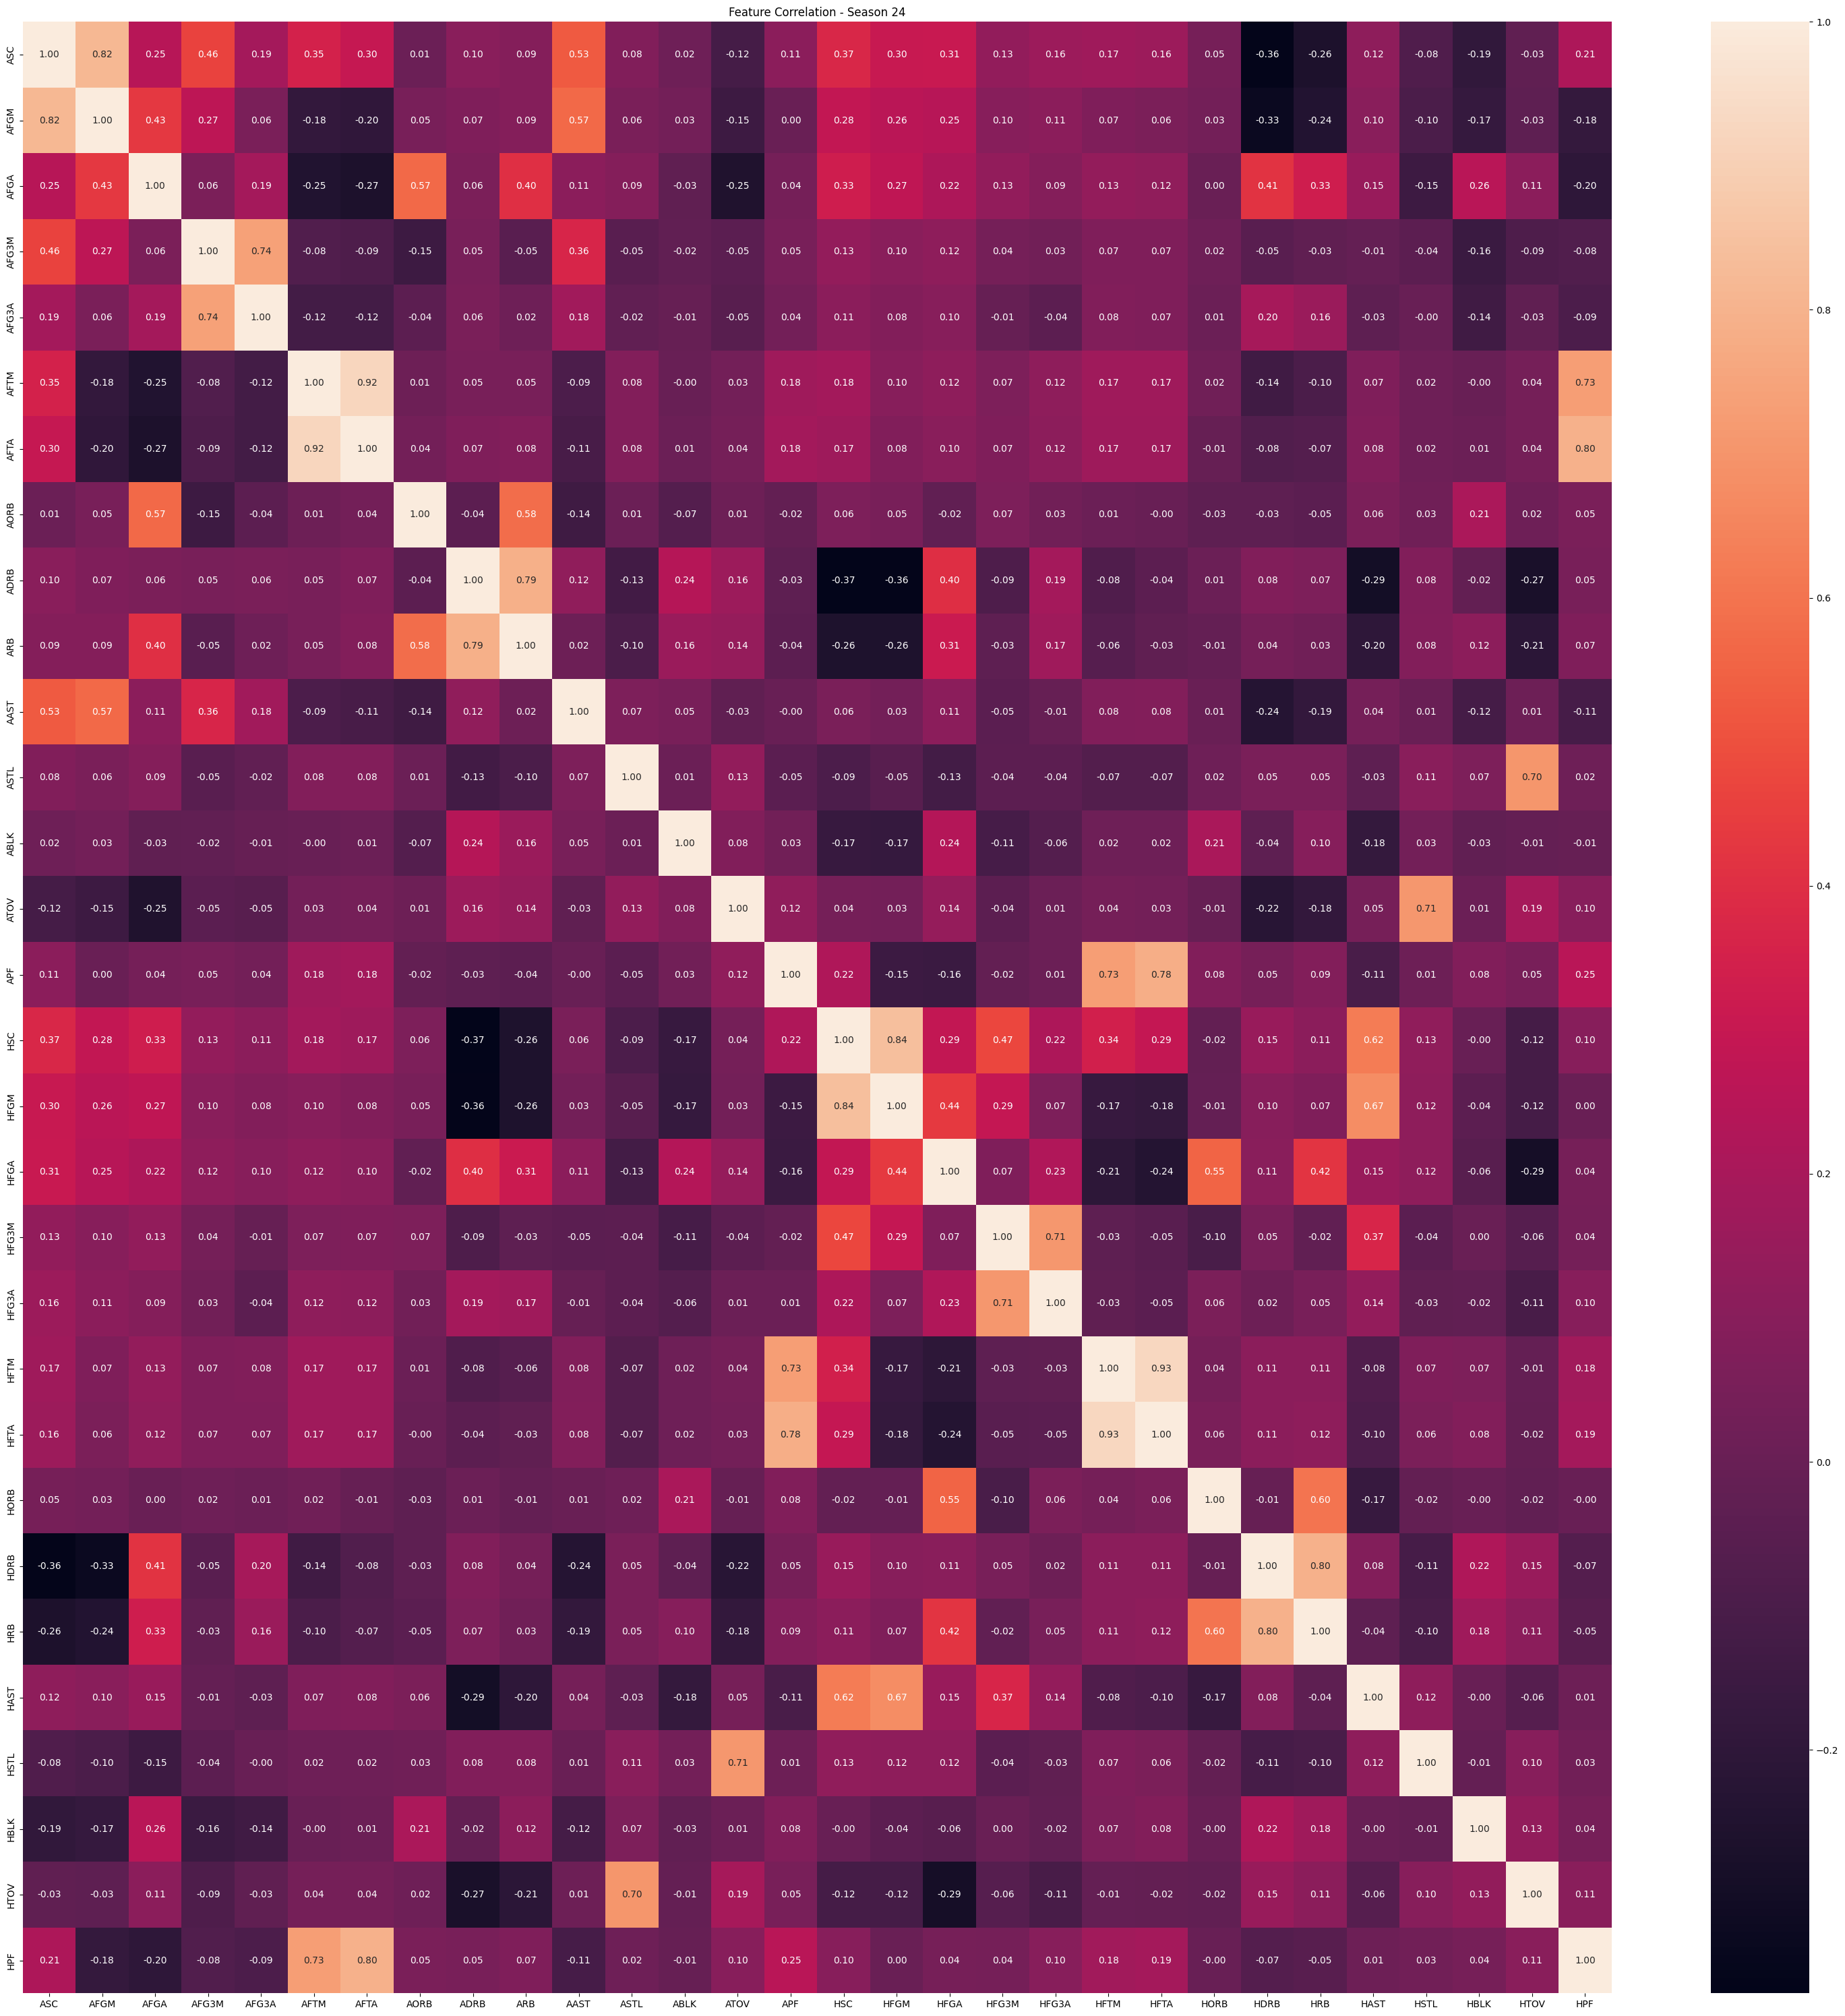

In [19]:
df_lastSeason = df[df["Season"] == df["Season"].max()]
corr = df_lastSeason[columnsA + columnsH].corr()

size = len(columnsA + columnsH)
f,ax = plt.subplots(figsize=(size, size))

sns.heatmap(corr, annot=True, fmt=".2f")
plt.title(f"Feature Correlation - Season {df["Season"].max()}")
plt.tight_layout()
plt.savefig(os.path.join("..", "plots", f"feature_corr_season_{df["Season"].max()}.pdf"))
plt.show()

### H features distributions

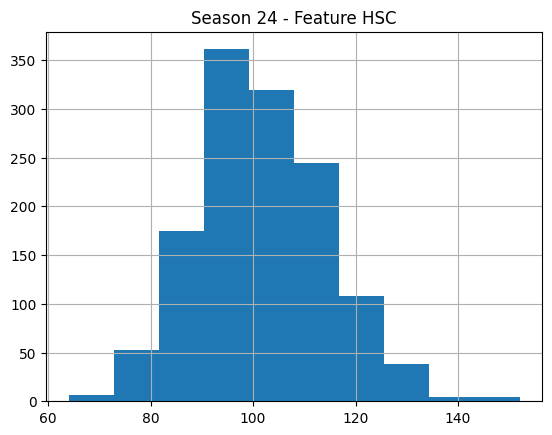

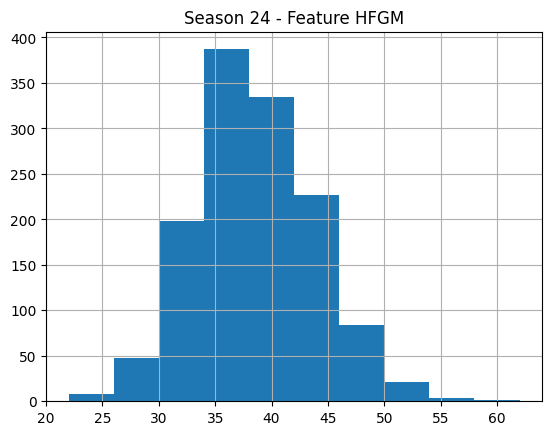

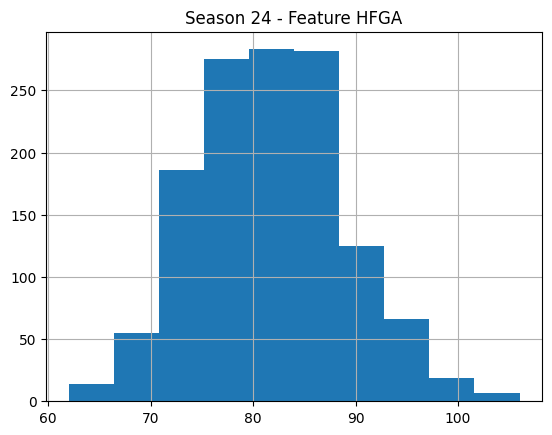

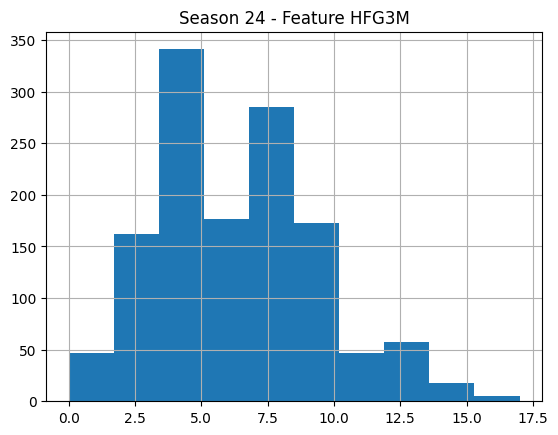

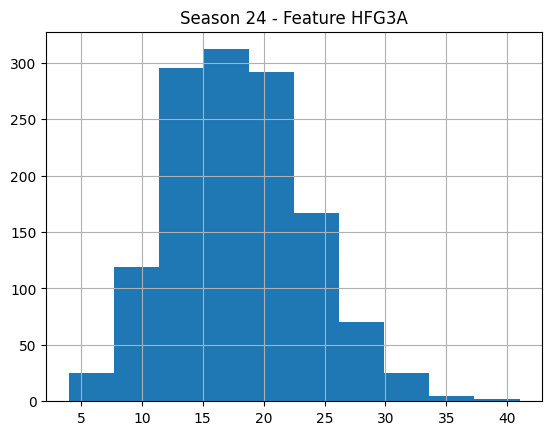

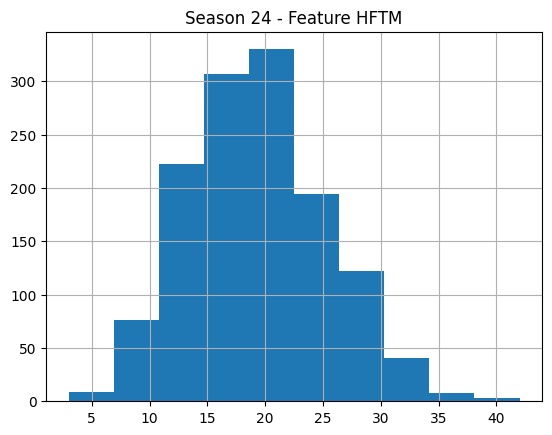

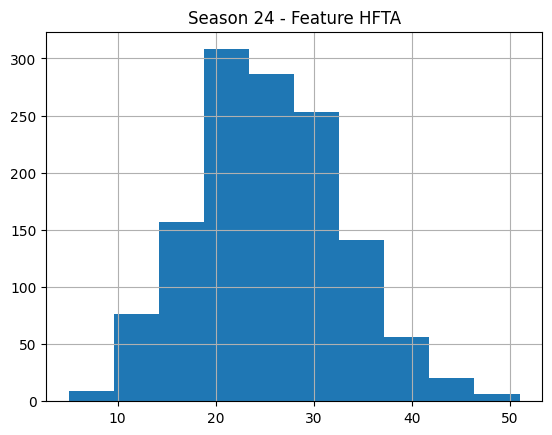

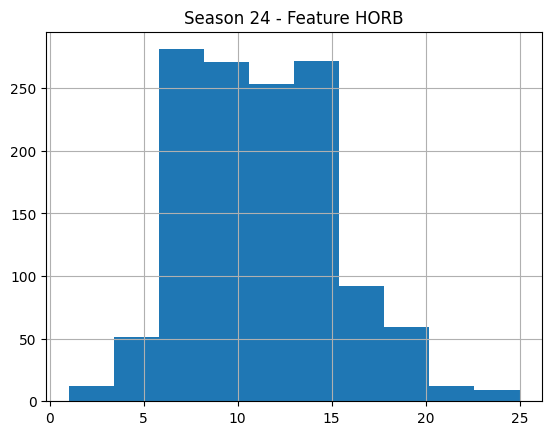

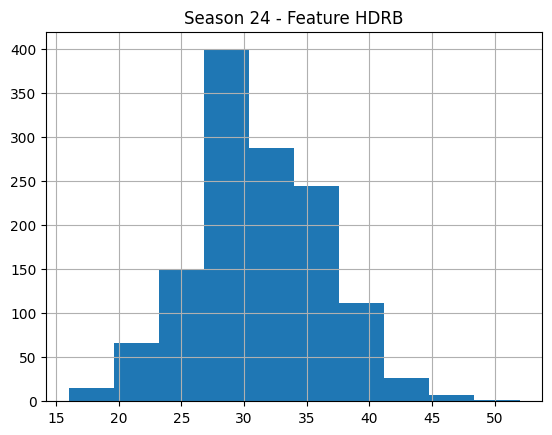

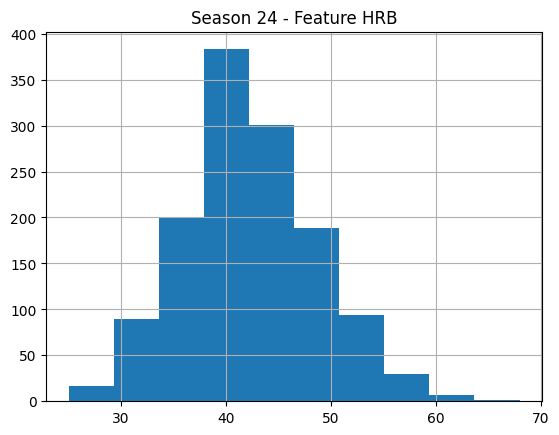

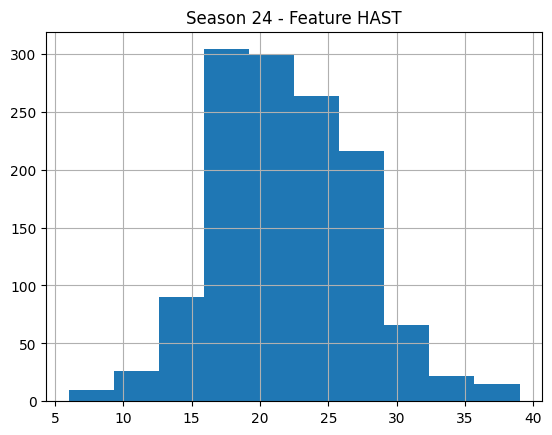

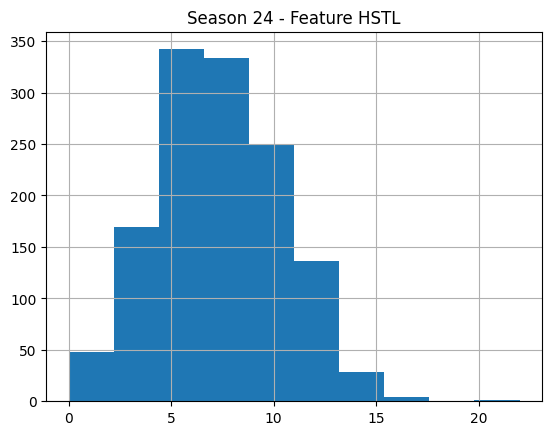

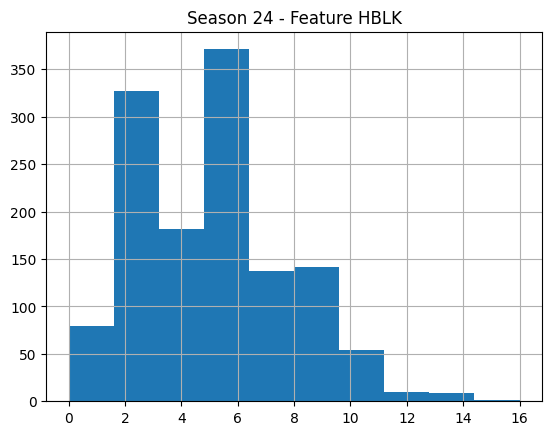

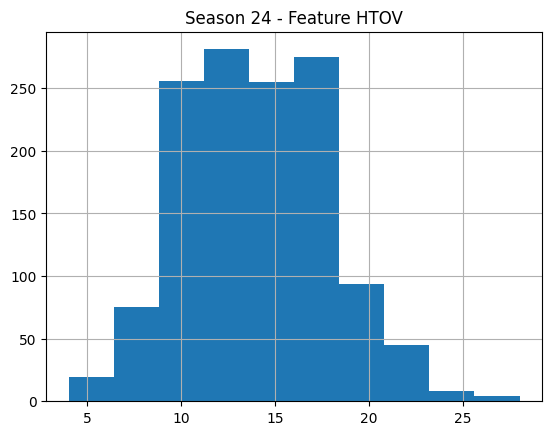

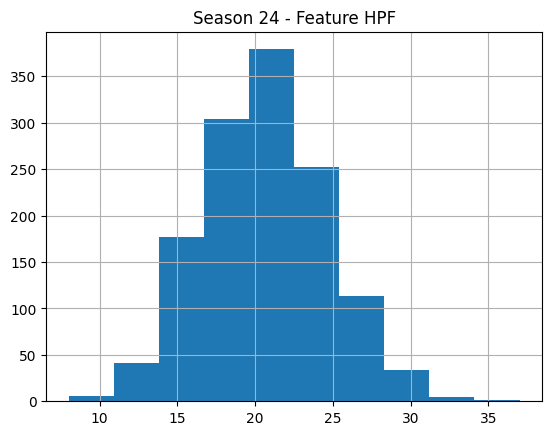

In [20]:
season = df["Season"].max()
df_lastS = df[df["Season"] == season]
for name in columnsH:
    df_lastS[name].hist()
    plt.title(f"Season {season} - Feature {name}")
    plt.show()

## Average team score in N last games

In [21]:
rolling_n = 25

df_lastnH = df.groupby(["Season", "HID"]).rolling(rolling_n, closed="left")[columnsH].mean().reset_index().dropna()
df_lastnA = df.groupby(["Season", "AID"]).rolling(rolling_n, closed="left")[columnsA].mean().reset_index().dropna()


In [22]:
df_lastnH.drop(columns="level_2")

,Season,HID,HSC,HFGM,HFGA,HFG3M,HFG3A,HFTM,HFTA,HORB,HDRB,HRB,HAST,HSTL,HBLK,HTOV,HPF
25,1,1,107.60,42.52,89.24,0.96,3.72,21.60,30.44,15.60,31.44,47.04,29.84,7.92,7.60,16.96,23.40
26,1,1,107.72,42.52,89.52,0.92,3.72,21.76,30.40,15.64,32.28,47.92,30.08,7.88,7.68,17.08,23.28
27,1,1,108.04,42.60,89.24,0.92,3.68,21.92,30.60,15.68,32.36,48.04,30.16,7.64,7.60,17.04,23.36
28,1,1,107.64,42.52,89.40,0.96,3.88,21.64,30.16,15.52,32.08,47.60,30.16,7.60,7.28,16.76,23.36
29,1,1,106.76,42.12,89.04,0.96,3.96,21.56,30.04,15.48,32.24,47.72,29.44,7.52,7.24,17.08,22.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28985,24,44,99.28,36.56,77.72,6.32,16.60,19.84,26.64,9.72,31.92,41.64,22.32,7.52,7.48,15.24,18.32
28986,24,44,100.12,36.68,77.80,6.24,16.36,20.52,27.24,9.92,31.32,41.24,22.44,7.44,7.40,14.92,18.40
28987,24,44,100.32,36.72,77.16,6.36,16.24,20.52,27.16,9.76,31.16,40.92,22.60,7.48,7.28,14.92,18.48
28988,24,44,99.36,36.44,77.32,6.16,16.16,20.32,26.88,10.08,30.96,41.04,22.48,7.68,7.16,14.88,18.40


In [23]:
df_lastnA.drop(columns="level_2")

,Season,AID,ASC,AFGM,AFGA,AFG3M,AFG3A,AFTM,AFTA,AORB,ADRB,ARB,AAST,ASTL,ABLK,ATOV,APF
25,1,1,104.04,40.88,86.48,1.08,3.84,21.20,28.00,13.28,29.68,42.96,24.28,8.64,6.28,17.96,25.64
26,1,1,104.24,40.80,86.32,1.08,3.76,21.56,28.48,13.00,29.56,42.56,24.60,8.68,6.28,17.52,25.12
27,1,1,105.16,41.08,86.28,1.08,3.76,21.92,28.96,12.68,30.28,42.96,24.68,8.68,6.52,17.40,24.96
28,1,1,105.04,41.16,85.84,1.00,3.68,21.72,28.92,12.48,30.72,43.20,24.80,8.56,6.28,17.28,24.72
29,1,1,105.48,41.00,85.68,1.04,3.60,22.44,29.72,12.64,30.64,43.28,24.40,8.48,6.04,17.32,24.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28985,24,44,94.40,34.32,76.52,5.60,16.64,20.16,26.32,10.68,29.40,40.08,19.44,7.64,4.28,14.80,18.76
28986,24,44,94.92,34.36,76.24,5.84,16.92,20.36,26.32,10.68,29.60,40.28,19.40,7.72,4.40,15.20,18.84
28987,24,44,94.40,34.12,76.44,5.80,16.60,20.36,26.48,10.92,29.72,40.64,19.40,7.76,4.60,14.92,18.76
28988,24,44,94.32,34.44,77.24,5.56,16.20,19.88,25.92,11.20,30.04,41.24,19.88,7.64,4.68,15.00,18.80


### H vs A performance difference

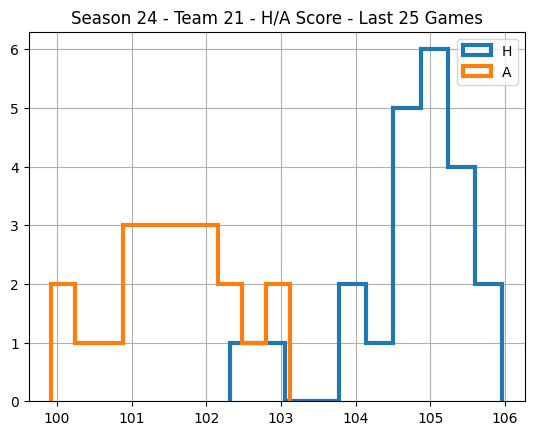

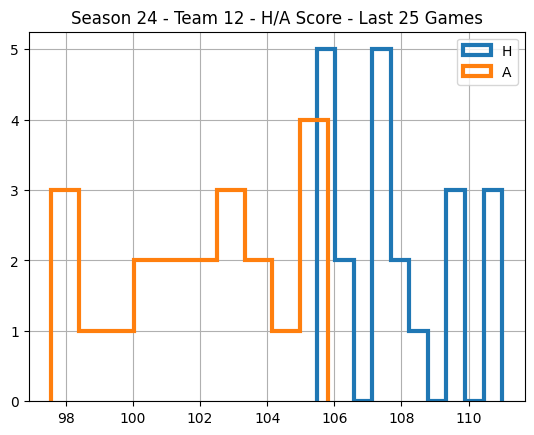

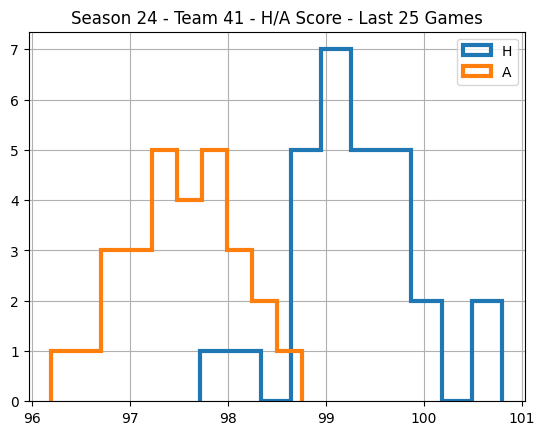

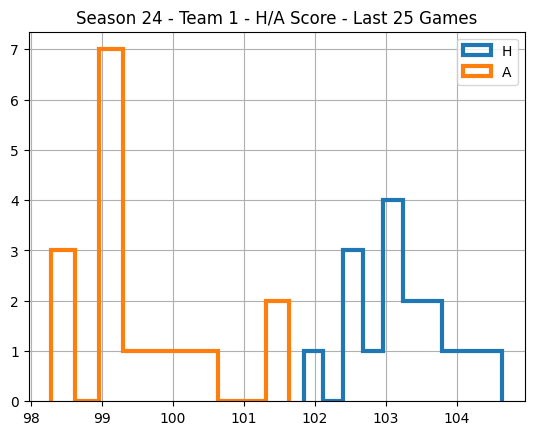

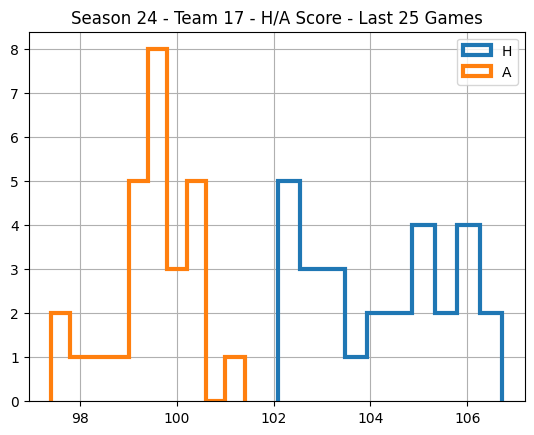

In [24]:
sea = df["Season"].max()
df_tmp = df[df["Season"] == sea]


teamIDs = list(set(df_tmp["HID"]) | set(df_tmp["AID"]))
for id in np.random.choice(teamIDs, 5, False):

    df_lastnH[(df_lastnH["Season"] == sea) & (df_lastnH["HID"] == id)]["HSC"].hist(label="H", histtype="step", lw=3)
    df_lastnA[(df_lastnA["Season"] == sea) & (df_lastnA["AID"] == id)]["ASC"].hist(label="A", histtype="step", lw=3)

    plt.legend()
    plt.title(f"Season {sea} - Team {id} - H/A Score - Last {rolling_n} Games")
    plt.show()


### Last N games average performance vs next game performance 

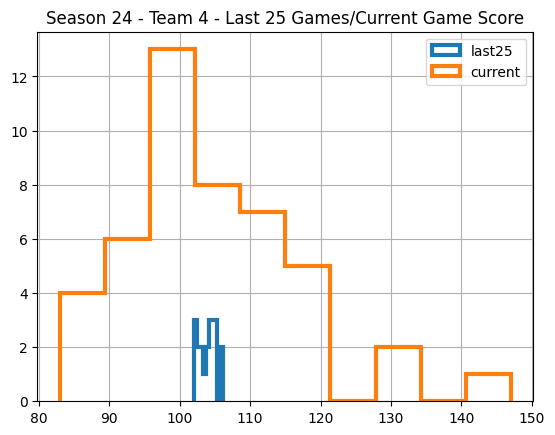

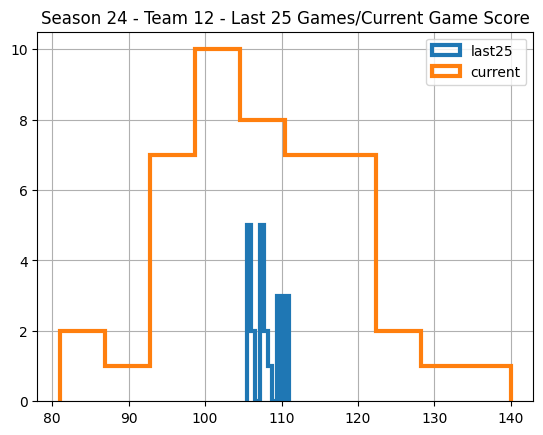

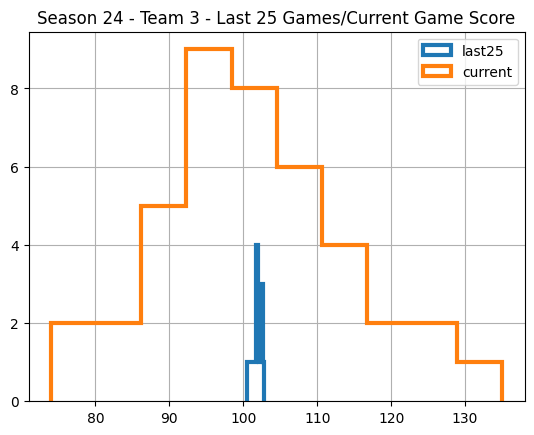

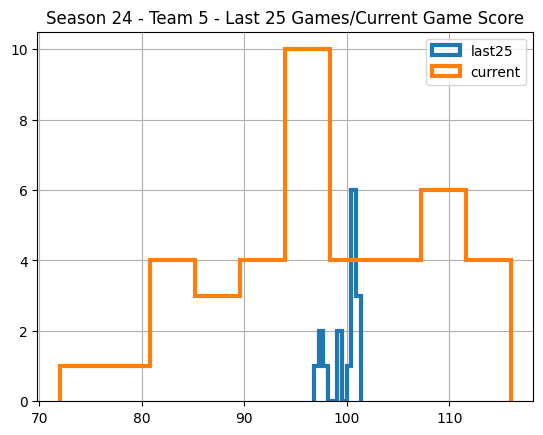

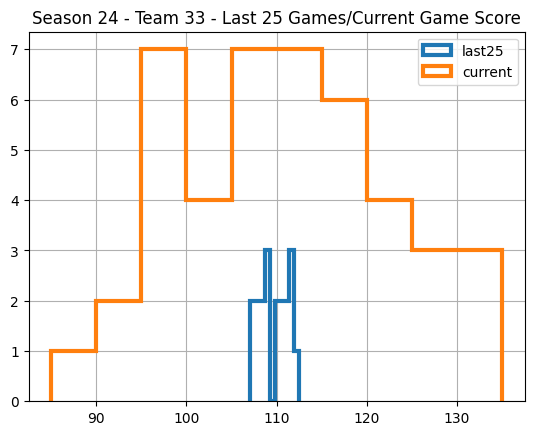

In [25]:
sea = df["Season"].max()
df_tmp = df[df["Season"] == sea]


teamIDs = list(set(df_tmp["HID"]) | set(df_tmp["AID"]))
for id in np.random.choice(teamIDs, 5, False):

    df_lastnH[(df_lastnH["Season"] == sea) & (df_lastnH["HID"] == id)]["HSC"].hist(label=f"last{rolling_n}", histtype="step", lw=3)
    df[(df["Season"] == sea) & (df["HID"] == id)]["HSC"].hist(label="current", histtype="step", lw=3)

    plt.legend()
    plt.title(f"Season {sea} - Team {id} - Last {rolling_n} Games/Current Game Score")
    plt.show()


## Feature normalization

### Rolling window of N games

In [26]:
norm_n = 250
tmp = df[columnsA + columnsH] / df.rolling(norm_n, closed="left")[columnsA + columnsH].mean().dropna()
tmp = tmp.dropna()
df_norm = pd.merge(df[meta_columns], tmp, left_index=True, right_index=True, how="inner")

In [27]:
df_sea_norm = df_norm.groupby("Season")

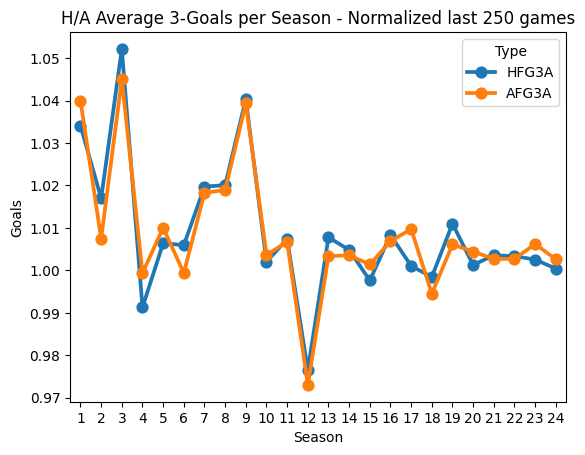

In [28]:
df_sea_norm_goals3 = df_sea_norm[["HFG3A", "AFG3A"]].mean()
df_sea_norm_goals3 = df_sea_norm_goals3.reset_index().melt(id_vars=["Season"], var_name="Type", value_name="Goals")

sns.pointplot(df_sea_norm_goals3, x="Season", y="Goals", hue="Type")
plt.title(f"H/A Average 3-Goals per Season - Normalized last {norm_n} games")
plt.show()


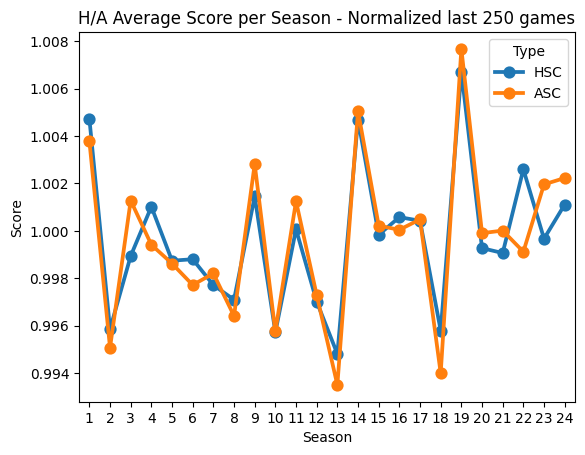

In [29]:
df_sea_norm_score = df_sea_norm[["HSC", "ASC"]].mean()
df_sea_norm_score = df_sea_norm_score.reset_index().melt(id_vars=["Season"], var_name="Type", value_name="Score")

sns.pointplot(df_sea_norm_score, x="Season", y="Score", hue="Type")
plt.title(f"H/A Average Score per Season - Normalized last {norm_n} games")
plt.show()


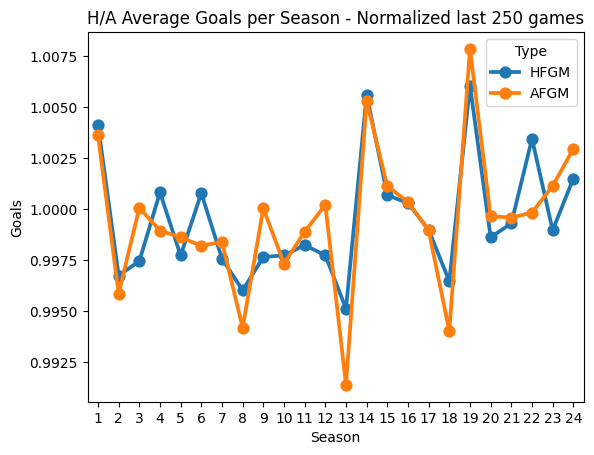

In [30]:
df_sea_norm_goals = df_sea_norm[["HFGM", "AFGM"]].mean()
df_sea_norm_goals = df_sea_norm_goals.reset_index().melt(id_vars=["Season"], var_name="Type", value_name="Goals")

sns.pointplot(df_sea_norm_goals, x="Season", y="Goals", hue="Type")
plt.title(f"H/A Average Goals per Season - Normalized last {norm_n} games")
plt.show()
